In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(tidyr)

In [3]:
library(ggplot2)

In [4]:
inmates <- read.csv("Data/inmateDB.csv", na.string = "NA")

In [5]:
head(inmates)

ID.NUMBER,COMMITTED.LAST.NAME,FIRST.NAME,MIDDLE.NAME,NAME.EXTENSION,LEGAL.LAST.NAME,FIRST.NAME.1,MIDDLE.NAME.1,NAME.EXTENSION.1,DATE.OF.BIRTH,⋯,PAROLE.ELIGIBILITY.DATE,EARLIEST.POSSIBLE.RELEASE.DATE,GOOD.TIME.LAW,INST.RELEASE.DATE,INST.RELEASE.TYPE,PAROLE.BOARD.NEXT.REVIEW.DATE.MONTH.YEAR.,PAROLE.BOARD.FINAL.HEARING.DATE.MONTH.YEAR.,PAROLE.BOARD.STATUS,PAROLE.DATE,PAROLE.DISCHARGE.DESC
1702,CLIFFORD,BRADLEY,,,,,,,,⋯,,,NA,1/6/1986,MANDATORY DISCHARGE,,,,,
6145,KANE,THOMAS,,,,,,,12/21/1928,⋯,6/20/1952,,2926,8/31/1952,ESCAPE,,,,,
6452,ATKINS,LARRY,,,,,,,7/26/1929,⋯,,,NA,7/20/1955,DISCRETIONARY PAROLE,,,PAROLED,12/9/1980,EARLY DISCHARGE BY PAROLE BRD
12444,SHANEYFELT,CHARLEY,,,,,,,4/10/1905,⋯,,,NA,12/24/1987,MANDATORY DISCHARGE,,,,,
15379,BEADES,JOE,,,,,,,10/12/1924,⋯,5/2/1955,LFE,2926,7/19/1989,DISCRETIONARY PAROLE,,,PAROLED,1/17/1993,EARLY DISCHARGE BY PAROLE BRD
15410,WILSON,JOHN,,,,,,,,⋯,5/28/1945,,2926,3/13/2003,OTHER,,,,,


In [6]:
str(inmates)

'data.frame':	66597 obs. of  32 variables:
 $ ID.NUMBER                                  : int  1702 6145 6452 12444 15379 15410 16657 18189 18540 19131 ...
 $ COMMITTED.LAST.NAME                        : Factor w/ 16727 levels "AARON","ABAIR",..: 2805 7508 549 13615 917 16265 9660 5774 4699 13972 ...
 $ FIRST.NAME                                 : Factor w/ 5980 levels "","A","AAGE",..: 601 5428 3342 882 2805 2814 880 2371 2538 1216 ...
 $ MIDDLE.NAME                                : Factor w/ 2831 levels "","   AKA,JOHNSON",..: 1 1 1 1 1 1 1 1 1954 2382 ...
 $ NAME.EXTENSION                             : Factor w/ 6 levels "   ","II ","III",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LEGAL.LAST.NAME                            : Factor w/ 842 levels "","10-24-2011 RESENT 24 MOS ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ FIRST.NAME.1                               : Factor w/ 645 levels "","                    ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ MIDDLE.NAME.1                              : Factor w/ 386 levels "

In [7]:
raceyear <- inmates %>%
    separate(INST.RELEASE.DATE, c("Day", "Month", "Year"), "/", convert = TRUE) %>%
    filter(Year >= 1980 & Year < 2017) %>%
    group_by(Year, RACE.DESC) %>%
    summarize(
       count=n()
    )

Warning message:
“Too few values at 4979 locations: 53, 67, 73, 77, 145, 152, 286, 341, 395, 421, 639, 715, 921, 965, 1120, 1274, 1365, 1442, 1459, 1482, ...”

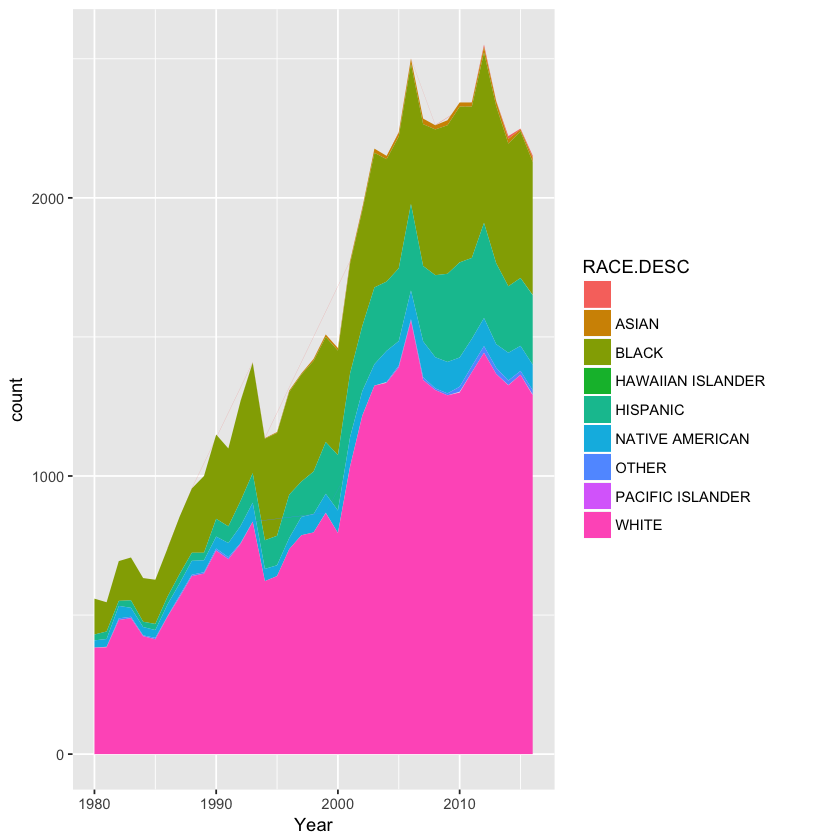

In [8]:
ggplot(raceyear, aes(x=Year, y=count, fill=RACE.DESC)) +
    geom_area()

In [9]:
yeartotals <- inmates %>%
    separate(INST.RELEASE.DATE, c("Day", "Month", "Year"), "/", convert = TRUE) %>%
    filter(Year >= 1980) %>%
    group_by(Year) %>%
    summarize(
       count=n()
    )

Warning message:
“Too few values at 4979 locations: 53, 67, 73, 77, 145, 152, 286, 341, 395, 421, 639, 715, 921, 965, 1120, 1274, 1365, 1442, 1459, 1482, ...”

In [10]:
percents <- raceyear %>% 
    inner_join(yeartotals, by="Year") %>%
    mutate(percentage = (count.x/count.y)*100)

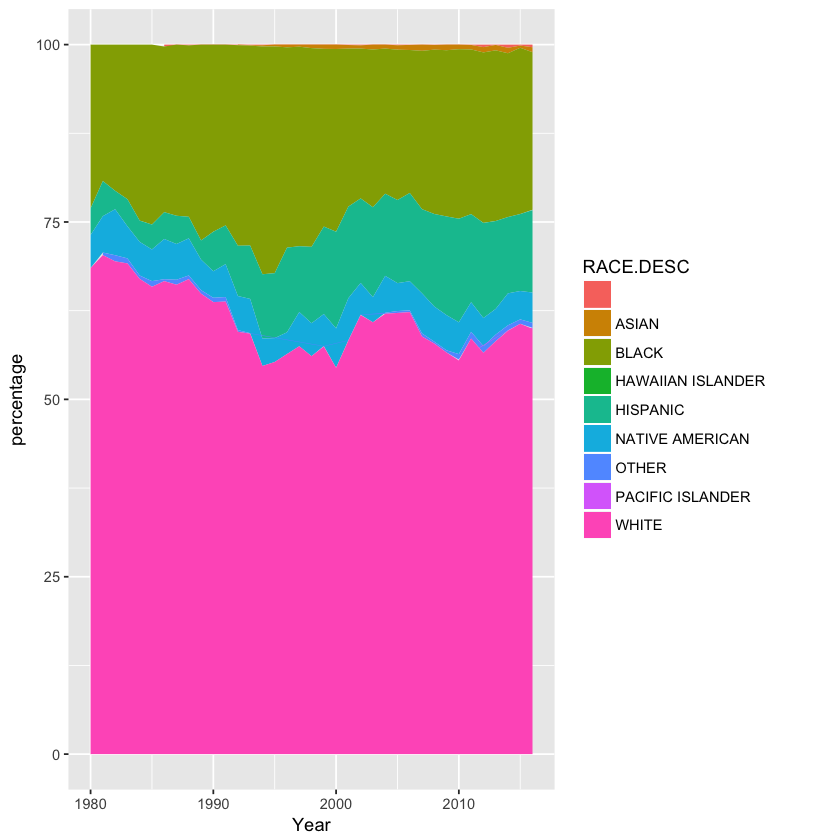

In [11]:
ggplot(percents, aes(x=Year, y=percentage, fill=RACE.DESC, label=RACE.DESC)) +
    geom_area()